<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random

In [ ]:
def euclidean(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans_self:
  def __init__(self, n_clusters, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter

  def fit(self, X_train):
    self.centroids = [random.choice(X_train)]

    for _ in range(self.n_clusters-1):
      dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0) # Calculando a distancia do ponto ao centroide
      dists /= np.sum(dists) # Normalizando as distancias
      new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists) # Escolhendo os pontos restantes com base em suas distancias
      self.centroids += [X_train[new_centroid_idx]]
    
    iteration = 0
    prev_centroids = None
    while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter: # Ajustando os centroides
      # Ordenando os pontos e atribuindo o centroide mais proximo
      sorted_points = [[] for _ in range(self.n_clusters)]
      for x in X_train:
        dists = euclidean(x, self.centroids)
        centroid_idx = np.argmin(dists)
        sorted_points[centroid_idx].append(x)

      prev_centroids = self.centroids

      # Reatribuindo os centroides como a media dos pontos que pertence a ele
      self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
      for i, centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = prev_centroids[i]
      iteration += 1

  def evaluate(self, X):
    centroids = []
    centroid_idxs = []
    
    for x in X:
      dists = euclidean(x, self.centroids)
      centroid_idx = np.argmin(dists)
      centroids.append(self.centroids[centroid_idx])
      centroid_idxs.append(centroid_idx)

    return centroids, centroid_idxs

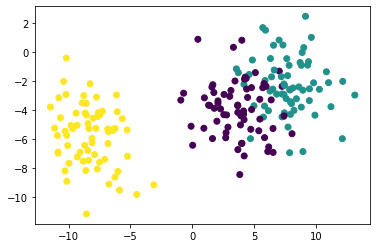

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=2, centers=3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
y_pred = kmeans.predict(X)

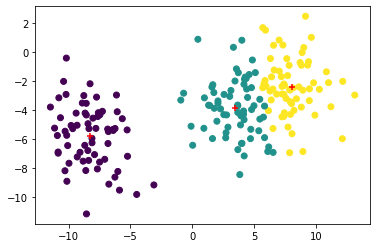

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
for center in kmeans.cluster_centers_:
  plt.scatter(center[0], center[1], c='red', marker='+')
plt.show()

In [ ]:
kmeans_self = KMeans_self(n_clusters=3)
kmeans_self.fit(X)

In [ ]:
centroids_self, y_pred_self = kmeans_self.evaluate(X)

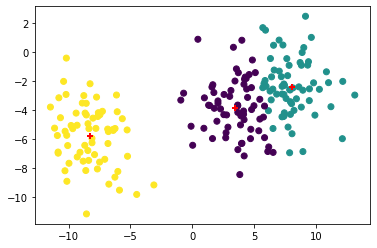

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_self)
for center in centroids_self:
  plt.scatter(center[0], center[1], c='red', marker='+')
plt.show()

References: 
- https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670